## Prepare Data for tur I


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Чтение данных из файла
file_path = 'tur1.xlsx'
data = pd.ExcelFile(file_path)

# Переименование и выбор необходимых столбцов
columns_mapping = {
    "Localitatea": "Localitate",
    "a) numărul de alegători \nînscriși în listele electorale \nde bază": "Număr alegători",
    "c) numărul de alegători\n care au primit buletine\nde vot": "Număr total de voturi",
    "Stoianoglo \nAlexandr": "Voturi Candidat 1",
    "Sandu \nMaia": "Voturi Candidat 2",
    "Usatîi\nRenato": "Voturi Candidat 3",
    "Tarlev\nVasile": "Voturi Candidat 4",
    "Vlah\nIrina": "Voturi Candidat 5",
    "Chicu\nIon": "Voturi Candidat 6",
    "Năstase\nAndrei": "Voturi Candidat 7",
    "Țîcu\nOctavian": "Voturi Candidat 8",
    "Furtună\nVictoria": "Voturi Candidat 9",
    "Ulianovschi\nTudor": "Voturi Candidat 10",
    "Morari\nNatalia": "Voturi Candidat 11",
    "h) numărul total de\n voturi valabil exprimate": "Număr voturi valabile"
}

sheet_data = data.parse('Foaie2').rename(columns=columns_mapping)

# Выбор столбцов для анализа
required_columns = [
    "Localitate", "Număr alegători", "Număr total de voturi",
    "Voturi Candidat 1", "Voturi Candidat 2", "Voturi Candidat 3",
    "Voturi Candidat 4", "Voturi Candidat 5", "Voturi Candidat 6",
    "Voturi Candidat 7", "Voturi Candidat 8", "Voturi Candidat 9",
    "Voturi Candidat 10", "Voturi Candidat 11",
    "Număr voturi valabile"
]


processed_data = sheet_data[required_columns]

# Удаление пустых строк
processed_data = processed_data.dropna(subset=["Localitate", "Număr alegători"])

# Преобразование типов данных
processed_data = processed_data.apply(pd.to_numeric, errors='ignore')
processed_data

<ipython-input-64-1412f001d9aa>:48: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  processed_data = processed_data.apply(pd.to_numeric, errors='ignore')


,Localitate,Număr alegători,Număr total de voturi,Voturi Candidat 1,Voturi Candidat 2,Voturi Candidat 3,Voturi Candidat 4,Voturi Candidat 5,Voturi Candidat 6,Voturi Candidat 7,Voturi Candidat 8,Voturi Candidat 9,Voturi Candidat 10,Voturi Candidat 11,Număr voturi valabile
0,Alegeri prezidențiale 2024,2710856.0,1564758.0,401215,656852,213169,49316,83193,31797,9946,14326,68778,7995,9444,1546031.0
1,1 - Circumscripţia electorală \nmunicipală Chi...,637632.0,362613.0,100997,173798,29698,9557,20333,8649,2330,3417,4605,2578,2641,358603.0
3,sector BOTANICA,1535.0,794.0,325,235,54,39,76,8,3,2,35,1,4,782.0
4,sector BOTANICA,1184.0,541.0,175,185,60,19,59,8,3,1,14,2,5,531.0
5,sector BOTANICA,1850.0,929.0,232,446,100,28,60,18,9,11,5,14,2,925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,sector Secții exteritoriale,0.0,182.0,42,106,12,5,10,1,1,1,1,1,1,181.0
2290,sector Secții exteritoriale,0.0,210.0,23,154,13,3,5,6,1,1,0,2,0,208.0
2291,sector Secții exteritoriale,988.0,659.0,12,628,6,0,6,0,0,4,1,0,0,657.0
2292,sector Secții exteritoriale,508.0,432.0,8,410,4,0,0,1,5,4,0,0,0,432.0


## Region Dataset

In [ ]:
locations = [
        "Total", "Briceni", "Ocnița", "Edineț", "Dondușeni", "Rîșcani", "Drochia", "Soroca", "Glodeni",
        "Bălți", "Florești", "UAT din stînga Nistrului", "Fălești", "Sîngerei", "Șoldănești", "Ungheni",
        "Telenești", "Rezina", "Nisporeni", "Călărași", "Orhei", "Strășeni", "Criuleni", "Dubăsari",
        "Hîncești", "Ialoveni", "Mun. Chișinău", "Anenii Noi", "Leova", "Cimișlia", "Căușeni", "Cantemir",
        "UTA Găgăuzia", "Basarabeasca", "Cahul", "Taraclia"
    ]

# data from https://pvt12024.cec.md/cec-template-presidential-results.html
election_raw_data = {
    "Localitate": locations,
    "SANDU MAIA": [
        656852, 4746, 2574, 6100, 2848, 5382, 7241, 10030, 4760, 10833, 8518, 4037, 7534, 9164, 4483, 13445, 10950,
        6428, 10519, 12353, 16883, 18166, 14519, 3963, 18937, 23773, 173798, 12269, 6606, 8055, 12198, 7856, 1415,
        2615, 14820, 731
    ],
    "STOIANOGLO ALEXANDR": [
        401215, 10377, 7551, 10434, 6423, 9283, 9362, 12888, 5911, 17520, 9705, 5670, 8809, 8446, 4028, 11734, 3664,
        4904, 3519, 4975, 9042, 5769, 5514, 4399, 7643, 5092, 100997, 8526, 4827, 4343, 7459, 4277, 30441, 2574,
        12401, 6876
    ],
    "USATÎI RENATO": [
        213169, 3395, 1933, 3705, 2105, 4595, 8056, 5355, 4775, 9672, 6258, 1146, 11092, 6851, 2883, 7729, 3609, 2696,
        3540, 3650, 5080, 5589, 4609, 1821, 6282, 5643, 29698, 4289, 2401, 2394, 4395, 2835, 421, 937, 4819, 185
    ],
    "VLAH IRINA": [
        83193, 1897, 3319, 3161, 1514, 1997, 1657, 1424, 1520, 8446, 1629, 2514, 2149, 1371, 261, 892, 224, 366,
        140, 403, 1672, 489, 514, 414, 478, 503, 20333, 1302, 435, 714, 749, 816, 9501, 950, 2539, 2584
    ],
    "FURTUNĂ VICTORIA": [
        68778, 1655, 1330, 1715, 1129, 752, 980, 501, 690, 1135, 1542, 1187, 581, 1461, 912, 1686, 1832, 415, 596,
        466, 5956, 575, 713, 789, 485, 437, 4605, 1374, 826, 1145, 1607, 507, 18066, 718, 1984, 4940
    ],
}

election_results = pd.DataFrame(election_raw_data)

# Рассчитаем общее количество голосов (сумма по всем кандидатам)
election_results["Număr total de voturi"] = election_results[
    ["SANDU MAIA", "STOIANOGLO ALEXANDR", "USATÎI RENATO", "VLAH IRINA", "FURTUNĂ VICTORIA"]
].sum(axis=1)

# Рассчитаем проценты голосов для топ-3 кандидатов
for candidate in ["SANDU MAIA", "STOIANOGLO ALEXANDR", "USATÎI RENATO"]:
    election_results[f"Percentage {candidate}"] = (
        election_results[candidate] / election_results["Număr total de voturi"] * 100
    )

election_results

,Localitate,SANDU MAIA,STOIANOGLO ALEXANDR,USATÎI RENATO,VLAH IRINA,FURTUNĂ VICTORIA,Număr total de voturi,Percentage SANDU MAIA,Percentage STOIANOGLO ALEXANDR,Percentage USATÎI RENATO
0,Total,656852,401215,213169,83193,68778,1423207,46.152949,28.190910,14.978074
1,Briceni,4746,10377,3395,1897,1655,22070,21.504304,47.018577,15.382873
2,Ocnița,2574,7551,1933,3319,1330,16707,15.406716,45.196624,11.570001
3,Edineț,6100,10434,3705,3161,1715,25115,24.288274,41.544893,14.752140
4,Dondușeni,2848,6423,2105,1514,1129,14019,20.315286,45.816392,15.015336
5,Rîșcani,5382,9283,4595,1997,752,22009,24.453633,42.178200,20.877823
6,Drochia,7241,9362,8056,1657,980,27296,26.527696,34.298066,29.513482
7,Soroca,10030,12888,5355,1424,501,30198,33.214120,42.678323,17.732962
8,Glodeni,4760,5911,4775,1520,690,17656,26.959674,33.478704,27.044631
9,Bălți,10833,17520,9672,8446,1135,47606,22.755535,36.802084,20.316767


# Visualisation

## Matrita de corelatie

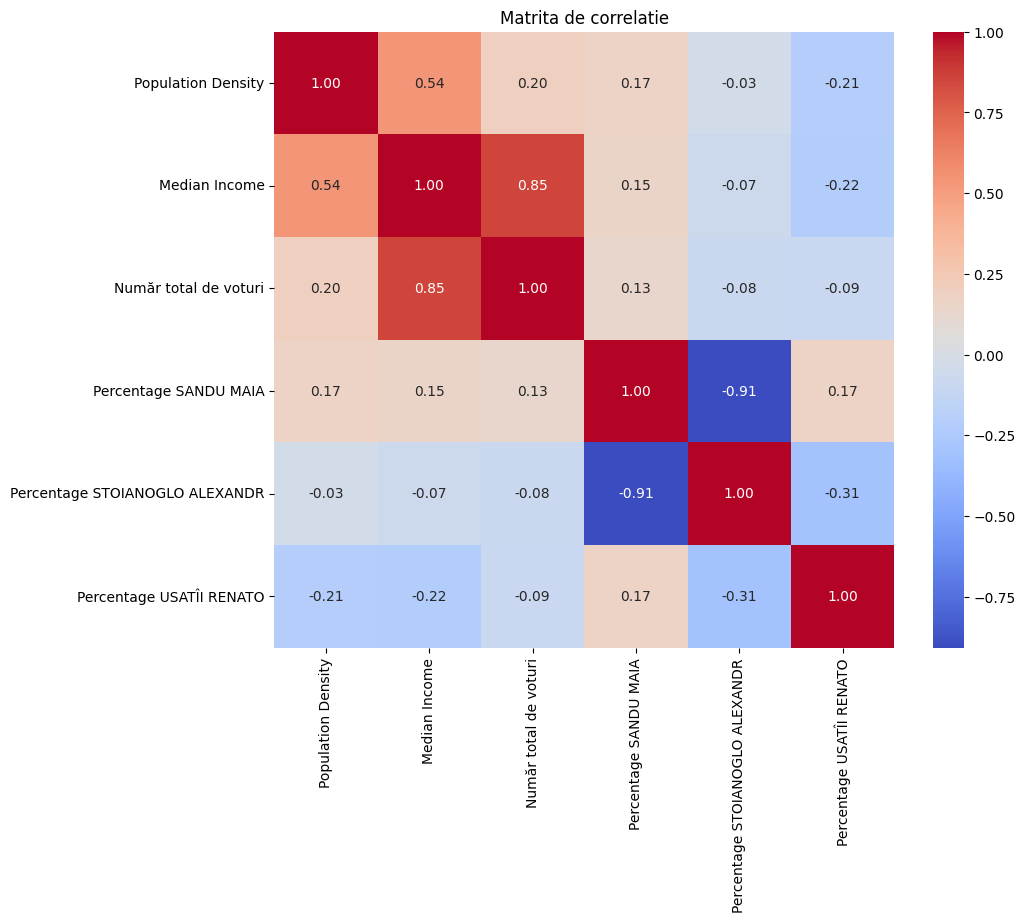

In [ ]:
# parsed data from statistica.md
socio_economic_data = {
    "Localitate": locations,
    "Population Density": [
        79.8, 64.0, 60.0, 70.0, 55.0, 58.0, 65.0, 75.0, 50.0, 100.0, 68.0, 90.0, 60.0, 62.0, 55.0, 80.0, 58.0, 60.0,
        55.0, 60.0, 85.0, 70.0, 65.0, 60.0, 75.0, 80.0, 1200.0, 65.0, 55.0, 60.0, 70.0, 55.0, 80.0, 50.0, 75.0, 60.0
    ],
    "Median Income": [
        12209.2, 8000, 7800, 8200, 7700, 7900, 8100, 8300, 7600, 9500, 8000, 8500, 7800, 8000, 7700, 8500, 7900, 8000,
        7700, 8000, 8700, 8200, 8100, 8000, 8300, 8500, 10965.0, 8100, 7700, 8000, 8200, 7700, 8500, 7600, 8300, 8000
    ]
}
socio_df = pd.DataFrame(socio_economic_data)

election_df = pd.DataFrame(election_results)

# Merge socio-economic data with election results
merged_df = pd.merge(socio_df, election_df, on="Localitate")

# Compute the correlation matrix
correlation_matrix = merged_df[["Population Density", "Median Income", "Număr total de voturi",
                                "Percentage SANDU MAIA", "Percentage STOIANOGLO ALEXANDR", "Percentage USATÎI RENATO"]].corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrita de correlatie")
plt.show()


## Creati harta-diagrama cu distroibutia pe top-3 candidati, marcand cu culoarea respectiva candidatului raionul respectiv

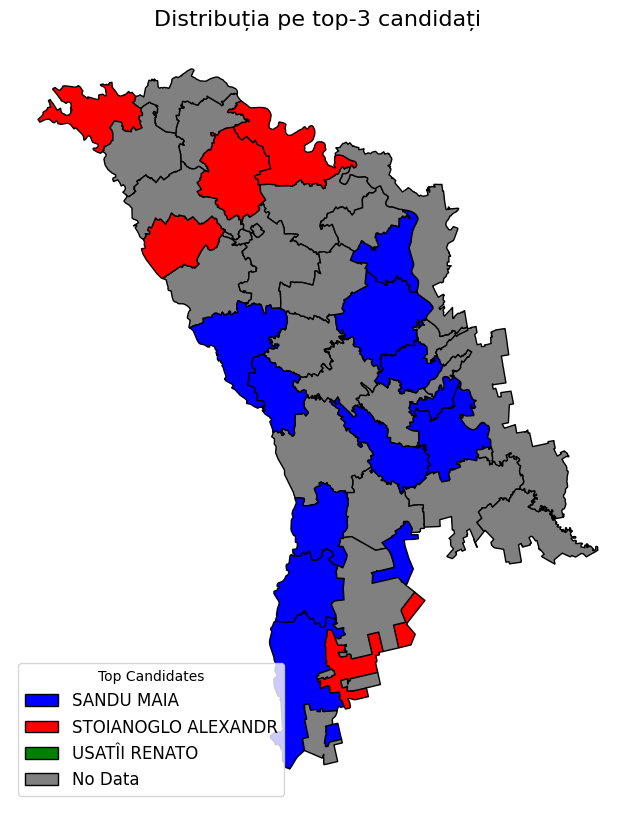

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Загрузка GeoJSON
geo_data = gpd.read_file('moldova-geojson.json')

# Определяем кандидата с наибольшим количеством голосов
election_results["Top Candidate"] = election_results[
    ["SANDU MAIA", "STOIANOGLO ALEXANDR", "USATÎI RENATO"]
].idxmax(axis=1)

# Переименование столбцов для объединения
geo_data = geo_data.rename(columns={"name": "Localitate"})
geo_data = geo_data.merge(election_results, on="Localitate", how="left")

# Цветовая схема для топ-3 кандидатов
candidate_colors = {
    "SANDU MAIA": "blue",
    "STOIANOGLO ALEXANDR": "red",
    "USATÎI RENATO": "green",
    "No Data": "gray"
}

# Заменяем NaN на серый цвет
geo_data["Color"] = geo_data["Top Candidate"].map(candidate_colors)
geo_data["Color"] = geo_data["Color"].fillna("gray")  # Серый для отсутствующих данных

# Визуализация карты
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
geo_data.plot(ax=ax, color=geo_data["Color"], edgecolor="black")

# Добавление легенды
legend_elements = [
    Patch(facecolor="blue", edgecolor="black", label="SANDU MAIA"),
    Patch(facecolor="red", edgecolor="black", label="STOIANOGLO ALEXANDR"),
    Patch(facecolor="green", edgecolor="black", label="USATÎI RENATO"),
    Patch(facecolor="gray", edgecolor="black", label="No Data")
]
ax.legend(handles=legend_elements, loc="lower left", title="Top Candidates", fontsize=12)

# Заголовок и отключение осей
plt.title("Distribuția pe top-3 candidați", fontsize=16)
plt.axis("off")
plt.show()


## 9 Creati diagrama cu distributia voturilor pe varste

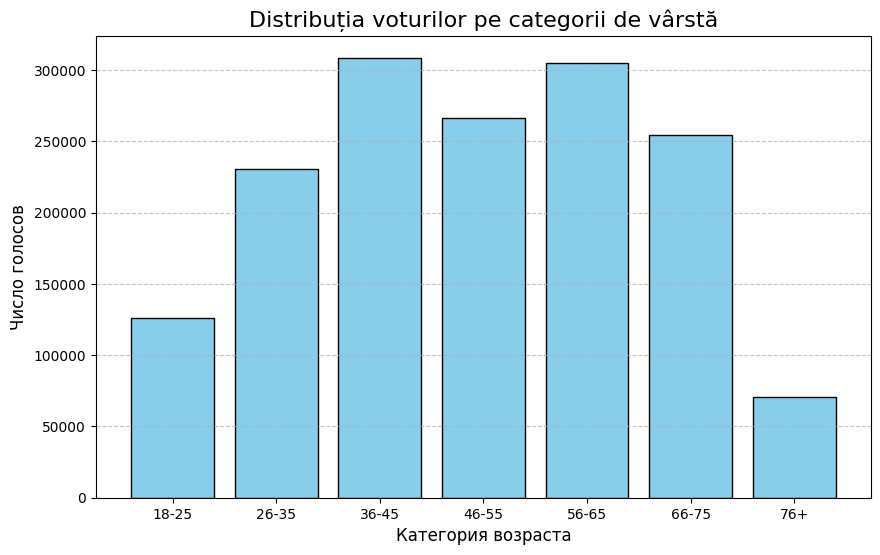

In [ ]:
# Данные о голосах по возрастным категориям
age_data = {
    "Возрастная категория": ["18-25", "26-35", "36-45", "46-55", "56-65", "66-75", "76+"],
    "Număr alegători": [270488, 499520, 635314, 485298, 439008, 336375, 118172],
    "Număr voturi": [126287, 230927, 308666, 266490, 305158, 254792, 70385]
}

# Создание DataFrame
age_df = pd.DataFrame(age_data)

# Построение диаграммы
plt.figure(figsize=(10, 6))
plt.bar(age_df["Возрастная категория"], age_df["Număr voturi"], color="skyblue", edgecolor="black")
plt.title("Distribuția voturilor pe categorii de vârstă", fontsize=16)
plt.xlabel("Категория возраста", fontsize=12)
plt.ylabel("Число голосов", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Показ диаграммы
plt.show()


## 10 Creati diagrama cu votanti pe categorii de varste (afisand numarul votantilor din total alegatori)


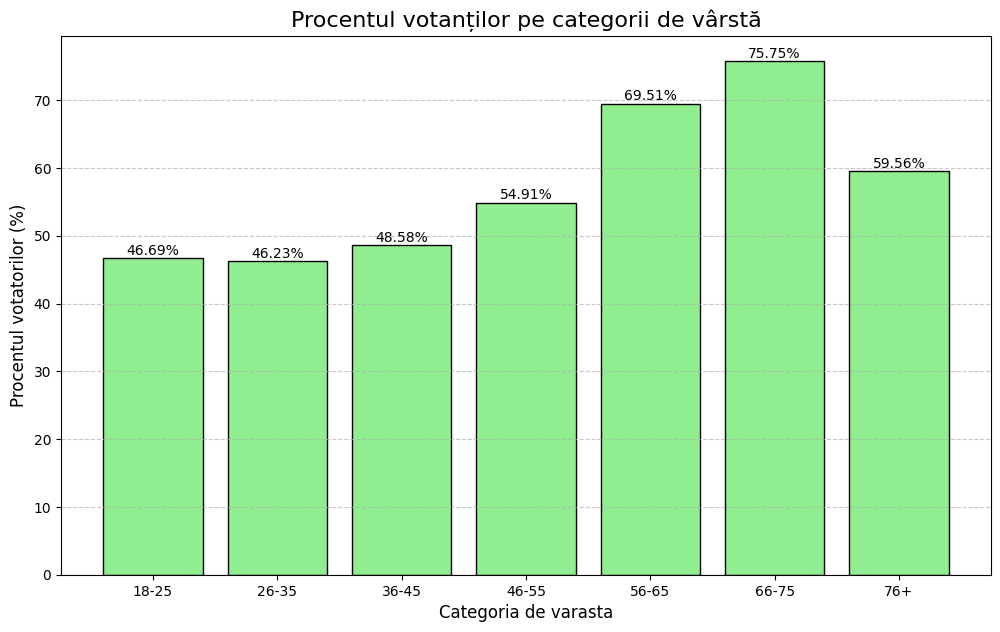

In [ ]:
# Рассчитываем долю проголосовавших
age_df["Procent voturi"] = (age_df["Număr voturi"] / age_df["Număr alegători"]) * 100

# Построение диаграммы
plt.figure(figsize=(12, 7))
plt.bar(age_df["Возрастная категория"], age_df["Procent voturi"], color="lightgreen", edgecolor="black")

# Подписи и настройки
plt.title("Procentul votanților pe categorii de vârstă", fontsize=16)
plt.xlabel("Categoria de varasta", fontsize=12)
plt.ylabel("Procentul votatorilor (%)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Добавляем значения на диаграмму
for index, value in enumerate(age_df["Procent voturi"]):
    plt.text(index, value + 0.5, f"{value:.2f}%", ha='center', fontsize=10)

# Показ диаграммы
plt.show()